In [1]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")
using DrugResponseModel
using Statistics, Plots
Plots.scalefontsizes(0.7)

Precompiling project...
  ✓ DrugResponseModel
1 dependency successfully precompiled in 8 seconds (147 already precompiled)
  Activating environment at `~/ODE/DrugResponseModel.jl/Project.toml`


In [20]:
function plot_ribbon(conc, g1m, g2m, g1s, g2s, tite, G1, G2, i, leg)
    time = LinRange(0.0, 95.0, 189)

    plot(
        time,
        g1m[:, i],
        ribbon= g1s[:, i],
        title = tite,
        titlefontsize = 8,
        color = 6,
        legend=leg,
        label = "G1",
        xlabel = "time [hr]",
        ylabel = "cell number",
        alpha = 0.1,
    )
    plot!(time, G1[:, i], label = "G1 sim", color = 6, lw=1)
    plot!(time, g2m[:, i], ribbon=g2s[:, i], color = 7, label = "G2", alpha = 0.1)
    plot!(time, G2[:, i], label = "G2 sim", color = 7, lw=1)
    ylims!((0.0, 35))
end

function figure1()

    concs, popul1, g1s1, g2s1 = load(189, 1);
    _, popul2, g1s2, g2s2 = load(189, 2);
    _, popul3, g1s3, g2s3 = load(189, 3);

    # find G1 std and mean ***** data ******
    g1S = cat(g1s1, g1s2, g1s3, dims=4);
    g2S = cat(g2s1, g2s2, g2s3, dims=4);
    g1m = mean(g1S, dims = 4); # mean G1
    g2m = mean(g2S, dims = 4); # mean G2

    g1s = std(g1S, dims = 4);
    g2s = std(g2S, dims = 4);

    ps = [44.184, 1.24076, 0.0692788, 0.0460918, 0.3822, 0.854034, 0.605391, 0.771326, 0.0138293, 0.00183699, 0.000293753, 0.0127534, 0.00011816, 0.0142541, 60.6069, 0.899573, 1.99993, 0.0748216, 1.99326, 0.468332, 1.99864, 1.22536, 0.000141615, 0.0318616, 0.000216899, 8.80158e-7, 0.598489, 0.00110572, 6.68492, 2.05974, 1.99936, 0.167588, 0.507586, 0.316074, 0.248084, 0.826596, 1.6164e-5, 3.10987e-6, 3.55996e-5, 7.73526e-6, 0.0774056, 8.26708e-5, 3.34656, 2.83739, 0.0907361, 0.108245, 1.9758, 1.96985, 1.9993, 0.210137, 0.0690636, 1.30442e-5, 0.0767181, 0.00991078, 6.87891e-5, 1.45086e-5, 18.2253, 1.1841, 1.00505, 0.0735852, 1.97326, 0.783828, 0.45769, 1.99355, 0.0519941, 0.000533671, 0.00204743, 9.52975e-5, 5.23806e-5, 0.0677505, 0.339953, 0.403341, 0.802518, 0.470576, 1.298, 0.423103];
    efcs = getODEparams(ps, concs);

    # ******* model simulations ********
    G1 = zeros(189, 7, 5)
    G2 = zeros(189, 7, 5)

    t = LinRange(0.0, 95.0, 189)
    for k=1:5 # drug number
        for i = 1:7 # concentration number
            G1[:, i, k], G2[:, i, k], _ = predict(efcs[:, i, k], efcs[:, 1, k], t)
        end
    end

    titles1 = ["control", "$(concs[2,1]) nM Lapatinib", "$(concs[3,1]) nM Lapatinib", "$(concs[4,1]) nM Lapatinib", "$(concs[5,1]) nM Lapatinib", "$(concs[6,1]) nM Lapatinib", "$(concs[7,1]) nM Lapatinib"]
    p1 = [plot_ribbon(g1m[:, i, 1, 1], g2m[:, i, 1, 1], g1s[:, i, 1, 1], g2s[:, i, 1, 1], titles1[i]) for i=1:7]
    titles2 = ["control", "$(concs[2,2]) nM Doxorubicin", "$(concs[3,2]) nM Doxorubicin", "$(concs[4,2]) nM Doxorubicin", "$(concs[5,2]) nM Doxorubicin", "$(concs[6, 2]) nM Doxorubicin", "$(concs[7,2]) nM Doxorubicin"]
    p2 = [plot_ribbon(g1m[:, i, 2, 1], g2m[:, i, 2, 1], g1s[:, i, 2, 1], g2s[:, i, 2, 1], titles2[i]) for i=1:7]
    p3 = plot_pG1(concs[:, 1], efcs[1:2, :, 1], 1.5, "Lapatinib", "prog.")
    p4 = plot_pG1(concs[:, 1], efcs[7:8, :, 1], 0.1, "Lapatinib", "death.")
    p5 = plot_pG2(concs[:, 2], efcs[3:6, :, 1], 1.5, "Doxorubicin", "prog.")
    p6 = plot_pG2(concs[:, 2], efcs[9:12, :, 1], 0.1, "Doxorubicin", "death.")
    p0=plot(legend=false,grid=false,foreground_color_subplot=:white)
    plot(p0, p1..., p2..., p3, p4, p5, p6, figsize=(2500, 2000), dpi=150)
    
end

figure1 (generic function with 1 method)

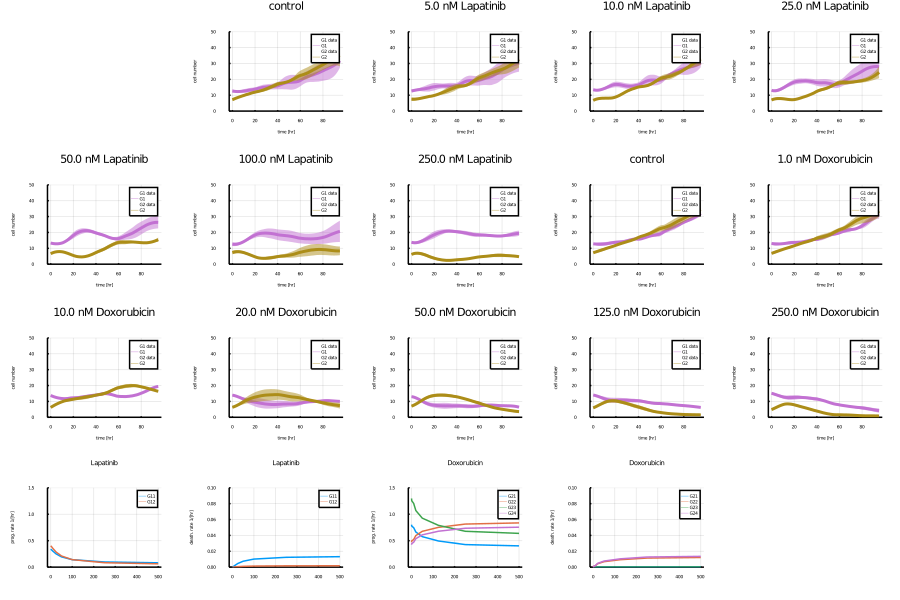

In [21]:
figure1()